In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
iris = load_iris()
#iris

In [2]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
df['species'] = df.target.apply(lambda x:iris.target_names[x])
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [8]:
iris_setosa = df.loc[df['species'] == 'setosa']
iris_virginica = df.loc[df['species'] == 'virginica']
iris_versicolor = df.loc[df['species'] == 'versicolor']

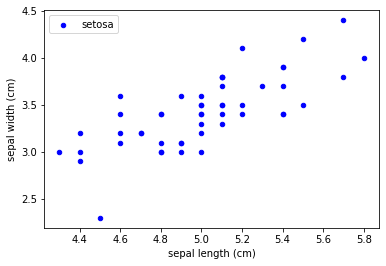

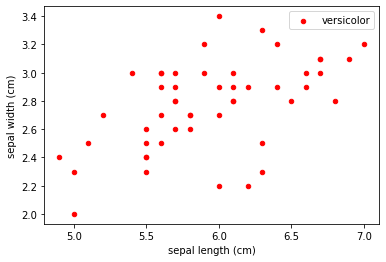

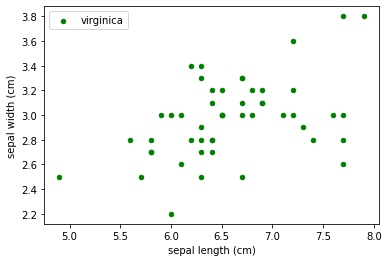

In [9]:
iris_setosa.plot('sepal length (cm)', 'sepal width (cm)', kind='scatter', label='setosa', color='b')
iris_versicolor.plot('sepal length (cm)', 'sepal width (cm)', kind='scatter',label='versicolor', color='r')
iris_virginica.plot('sepal length (cm)', 'sepal width (cm)', kind='scatter', label='virginica', color='g')
plt.show()

c:\users\91863\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


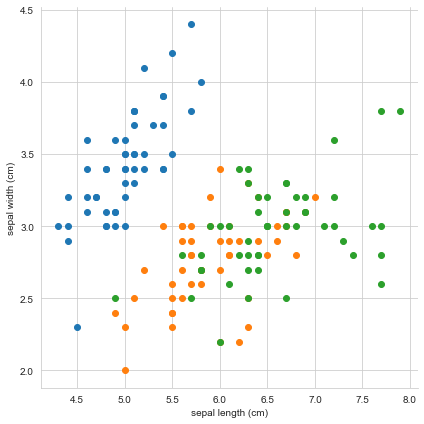

In [14]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue='species', size=6).map(plt.scatter, 'sepal length (cm)','sepal width (cm)')
plt.show()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [31]:
# number of data points for each class
df['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

## 2D Scatter Plot

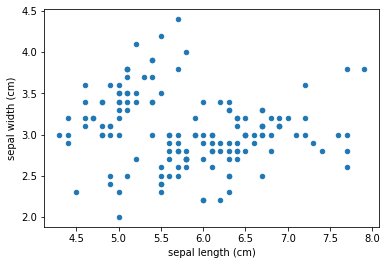

In [32]:
df.plot('sepal length (cm)', 'sepal width (cm)', kind = 'scatter')
plt.show()

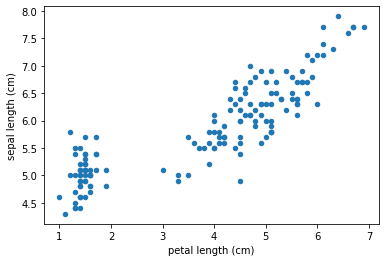

In [33]:
df.plot('petal length (cm)', 'sepal length (cm)', kind='scatter')
plt.show()

In [ ]:
#taking each class sepratly
iris_setosa = iris.loc[df['target']]

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(['target'], axis='columns'), df.target, test_size = 0.2)

In [12]:
len(x_train)

120

In [13]:
len(x_test)

30

In [44]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 40)

In [45]:
clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=40)

In [46]:
clf.score(x_test, y_test)

0.9333333333333333

In [47]:
y_pred = clf.predict(x_test)

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
cm

array([[ 7,  0,  0],
       [ 0, 10,  0],
       [ 0,  2, 11]], dtype=int64)

Text(51.0, 0.5, 'Truth')

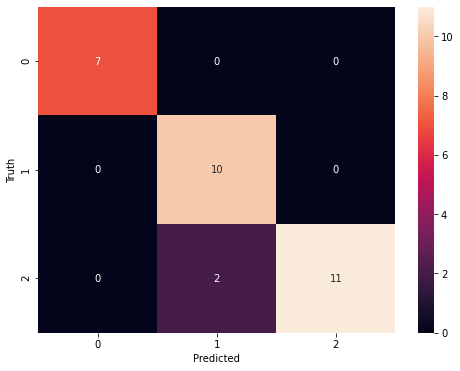

In [53]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 6))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [54]:
import pickle

In [55]:
with open('models//IrisRandom', 'wb') as f:
    pickle.dump(clf, f)

In [56]:
with open('models//IrisRandom', 'rb') as f:
    iris_model = pickle.load(f)

In [57]:
iris_model.predict(x_test)

array([0, 1, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 2, 1, 1, 2, 0, 2, 2, 0, 0,
       2, 2, 1, 2, 1, 0, 1, 1])